In [12]:
import json
import pandas  as pd 
import os,sys,glob 


dataset_phase2 = pd.read_csv('../example_datasets/test.csv')

In [13]:
dataset_phase2

,File,source_code,line_error,error_type
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1]
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1]
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1]
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1]
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1]
...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0]
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0]
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119]
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0]


In [4]:
# Quét cái file
all_file=list(glob.glob("./dataset/*/CWE*.c")) + list(glob.glob("./dataset/*/*/CWE*.c"))+list(glob.glob("./dataset/*/*/*/CWE*.c")) 
all_file += list(glob.glob("./dataset/*/CWE*.cpp")) + list(glob.glob("./dataset/*/*/CWE*.cpp"))+list(glob.glob("./dataset/*/*/*/CWE*.cpp"))
len(all_file)

100883

In [5]:
#test_phase1[test_phase1.File.str.contains("CWE190")]

In [6]:
with open("../pred.json","r") as f:
  dataset_bert = json.load(f)

dataset=[]
for i in dataset_bert:
  dataset.append({'prob_lines':i['prob_lines'],'class_lines':i['class_lines']})
  
dataset_phase2['bert_info'] = dataset

In [7]:
# Tổng tệp dữ liệu cho phase 2
dataset_phase2

,File,source_code,line_error,error_type,bert_info
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
...,...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."


In [8]:
import ast
dataset_phase2.line_error=dataset_phase2.line_error.map(ast.literal_eval)
dataset_phase2.error_type=dataset_phase2.error_type.map(ast.literal_eval)

In [9]:
dataset_phase2

,File,source_code,line_error,error_type,bert_info
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
...,...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."


In [ ]:
all_pd=dataset_phase2
all_pd.columns=['file','source_code','line_error','error_type','bert_info','type_set']

In [100]:
all_pd

,file,source_code,line_error,error_type,bert_info,type_set
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
...,...,...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ...",phase2


In [101]:
ds=[]
for i in glob.glob("../tools_report/*.csv"):
  print(i)
  ds.append(pd.read_csv(i))
ds=pd.concat(ds,0)

../tools_report/CWE758_Undefined_Behavior_report.csv
../tools_report/CWE457_Use_of_Uninitialized_Variable_report.csv
../tools_report/CWE475_Undefined_Behavior_for_Input_to_API_report.csv
../tools_report/CWE761_Free_Pointer_Not_at_Start_of_Buffer_report.csv
../tools_report/CWE789_Uncontrolled_Mem_Alloc_report.csv
../tools_report/CWE401_Memory_Leak_report.csv
../tools_report/CWE775_Missing_Release_of_File_Descriptor_or_Handle_report.csv
../tools_report/CWE126_Buffer_Overread_report.csv
../tools_report/CWE134_Uncontrolled_Format_String_report.csv
../tools_report/CWE78_OS_Command_Injection_report.csv
../tools_report/CWE467_Use_of_sizeof_on_Pointer_Type_report.csv
../tools_report/CWE476_NULL_Pointer_Dereference_report.csv
../tools_report/CWE665_Improper_Initialization_report.csv
../tools_report/CWE762_Mismatched_Memory_Management_Routines_report.csv
../tools_report/CWE676_Use_of_Potentially_Dangerous_Function_report.csv
../tools_report/CWE190_Integer_Overflow_report.csv
../tools_report/CWE4

In [102]:
ds['CWE'] = ds.file.apply(lambda x:x.split("__")[0])
ds

,file,line,tool,message,CWE
0,CWE758_Undefined_Behavior__char_alloca_use_01.c,64,flawfinder,: [3] (random) srand: This function is not su...,CWE758_Undefined_Behavior
1,CWE758_Undefined_Behavior__char_alloca_use_01.c,24,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior
2,CWE758_Undefined_Behavior__char_alloca_use_01.c,23,framac,Warning: Calling undeclared function alloca. ...,CWE758_Undefined_Behavior
3,CWE758_Undefined_Behavior__char_alloca_use_02.c,95,flawfinder,: [3] (random) srand: This function is not su...,CWE758_Undefined_Behavior
4,CWE758_Undefined_Behavior__char_alloca_use_02.c,26,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior
...,...,...,...,...,...
1233,CWE416_Use_After_Free__return_freed_ptr_17.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free
1234,CWE416_Use_After_Free__return_freed_ptr_18.c,121,flawfinder,: [3] (random) srand: This function is not su...,CWE416_Use_After_Free
1235,CWE416_Use_After_Free__return_freed_ptr_18.c,25,flawfinder,: [1] (buffer) strlen: Does not handle string...,CWE416_Use_After_Free
1236,CWE416_Use_After_Free__return_freed_ptr_18.c,50,flawfinder,: [1] (buffer) strlen: Does not handle string...,CWE416_Use_After_Free


In [103]:
# Các file được định nghĩa line với minitest
sum = 0
for cwe in ds['CWE'].unique():
  print(cwe, len(ds[ds['CWE'] == cwe]))
  if cwe.split("_")[0] == 'CWE401':
    print(cwe, len(ds[ds['CWE'] == cwe]))
  sum += len(ds[ds['CWE'] == cwe])
print(sum)

CWE758_Undefined_Behavior 1488
CWE457_Use_of_Uninitialized_Variable 3926
CWE475_Undefined_Behavior_for_Input_to_API 159
CWE761_Free_Pointer_Not_at_Start_of_Buffer 3139
CWE789_Uncontrolled_Mem_Alloc 11542
CWE401_Memory_Leak 9196
CWE401_Memory_Leak 9196
CWE775_Missing_Release_of_File_Descriptor_or_Handle 509
CWE126_Buffer_Overread 7103
CWE134_Uncontrolled_Format_String 21760
CWE78_OS_Command_Injection 7260
CWE467_Use_of_sizeof_on_Pointer_Type 154
CWE476_NULL_Pointer_Dereference 1623
CWE665_Improper_Initialization 911
CWE762_Mismatched_Memory_Management_Routines 11594
CWE676_Use_of_Potentially_Dangerous_Function 87
CWE190_Integer_Overflow 20879
CWE469_Use_of_Pointer_Subtraction_to_Determine_Size 22
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 159
CWE587_Assignment_of_Fixed_Address_to_Pointer 22
CWE197_Numeric_Truncation_Error 4236
CWE563_Unused_Variable 1605
CWE415_Double_Free 4360
CWE369_Divide_by_Zero 6426
CWE252_Unchecked_Return_Value 960
CWE195_Signed_to_Unsig

In [104]:
# Cần chia data ra tỉ lệ 8:2
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
map_label={i:k for k,i in enumerate(ds.CWE.unique())}
ds=ds.reset_index(drop=True)

for train_index, test_index in skf.split(ds.index, ds.CWE.map(map_label)):
  train_index = train_index
  test_index = test_index
  
train_ds=ds.loc[train_index].copy().reset_index(drop=True)
test_ds=ds.loc[test_index].copy().reset_index(drop=True)

/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [172]:
train_ds

,file,line,tool,message,CWE
0,CWE758_Undefined_Behavior__char_alloca_use_01.c,64,flawfinder,: [3] (random) srand: This function is not su...,CWE758_Undefined_Behavior
1,CWE758_Undefined_Behavior__char_alloca_use_01.c,24,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior
2,CWE758_Undefined_Behavior__char_alloca_use_01.c,23,framac,Warning: Calling undeclared function alloca. ...,CWE758_Undefined_Behavior
3,CWE758_Undefined_Behavior__char_alloca_use_02.c,95,flawfinder,: [3] (random) srand: This function is not su...,CWE758_Undefined_Behavior
4,CWE758_Undefined_Behavior__char_alloca_use_02.c,26,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior
...,...,...,...,...,...
115830,CWE416_Use_After_Free__new_delete_int_64b.cpp,60,infer,The value written to &data (type int*) is neve...,CWE416_Use_After_Free
115831,CWE416_Use_After_Free__new_delete_int_64b.cpp,60,clang,warning: Value stored to 'data' during its ini...,CWE416_Use_After_Free
115832,CWE416_Use_After_Free__new_delete_long_01.cpp,97,flawfinder,: [3] (random) srand: This function is not su...,CWE416_Use_After_Free
115833,CWE416_Use_After_Free__new_delete_long_01.cpp,37,clang,warning: Use of memory after it is freed,CWE416_Use_After_Free


In [105]:
# Đây sẽ được coi là tập dataset dựa trên các file, từ những file này. thực tế thì có bao nhiêu lỗ hỏng cần tính
import os,sys,json,glob
import pandas as pd
import numpy as np
from xmljson import badgerfish as bf
from xml.etree.ElementTree import fromstring
from json import dumps

# đọc dữ liệu từ manaifest
data=bf.data(fromstring(open("dataset/manifest.xml","r").read()))
data=data['container']
data=data['testcase'] #Bao gồm tổng là 64,000 testcase, những trong 1 test lại có nhiều file
data[0]
ds=[]

In [106]:
for i in data:
  i=i['file'] 
  if isinstance(i,(list,tuple)):
    ds.extend(i)
  else: ds.append(i)
ds_pd=[]

In [107]:
for i in ds:
  path = i['@path'] 
  flaw =i.get("flaw",{"@line":None,"@name":None})
  cwe = path.split("__")[0]
  
  # nhưng file tồn tại nhiều CWE
  if isinstance(flaw, (list, tuple)):
    for fl in flaw:
      line = fl['@line']
      error_type = fl['@name']
      ds_pd.append({
          "File":path,
          "Line":line,
          "CWE":cwe,
      })
  else:
    line = flaw['@line']
    error_type = flaw['@name']
    ds_pd.append({
        "File":path,
        "Line":line,
        "CWE":cwe,
    })

In [108]:
# Đây sẽ được coin là những file có lổng hỏng trong gần 104,000k file
data_final=pd.DataFrame(ds_pd) 

# Filter những file không có lỗi, tức là những file có line
data_final=data_final[~data_final.Line.isna()]
data_final

,File,Line,CWE
0,CWE114_Process_Control__w32_char_connect_socke...,121.0,CWE114_Process_Control
1,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
2,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
3,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
4,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
...,...,...,...
106355,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,56.0,CWE90_LDAP_Injection
106357,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106361,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106365,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,154.0,CWE90_LDAP_Injection


In [109]:
test_ds

,file,line,tool,message,CWE
0,CWE758_Undefined_Behavior__struct_alloca_use_07.c,32,clang,warning: 1st function call argument is an unin...,CWE758_Undefined_Behavior
1,CWE758_Undefined_Behavior__struct_alloca_use_07.c,30,framac,Warning: Calling undeclared function alloca. ...,CWE758_Undefined_Behavior
2,CWE758_Undefined_Behavior__struct_alloca_use_08.c,113,flawfinder,: [3] (random) srand: This function is not su...,CWE758_Undefined_Behavior
3,CWE758_Undefined_Behavior__struct_alloca_use_08.c,40,clang,warning: 1st function call argument is an unin...,CWE758_Undefined_Behavior
4,CWE758_Undefined_Behavior__struct_alloca_use_08.c,38,framac,Warning: Calling undeclared function alloca. ...,CWE758_Undefined_Behavior
...,...,...,...,...,...
28938,CWE416_Use_After_Free__return_freed_ptr_17.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free
28939,CWE416_Use_After_Free__return_freed_ptr_18.c,121,flawfinder,: [3] (random) srand: This function is not su...,CWE416_Use_After_Free
28940,CWE416_Use_After_Free__return_freed_ptr_18.c,25,flawfinder,: [1] (buffer) strlen: Does not handle string...,CWE416_Use_After_Free
28941,CWE416_Use_After_Free__return_freed_ptr_18.c,50,flawfinder,: [1] (buffer) strlen: Does not handle string...,CWE416_Use_After_Free


In [110]:
test_ds['status'] = 0
test_ds

,file,line,tool,message,CWE,status
0,CWE758_Undefined_Behavior__struct_alloca_use_07.c,32,clang,warning: 1st function call argument is an unin...,CWE758_Undefined_Behavior,0
1,CWE758_Undefined_Behavior__struct_alloca_use_07.c,30,framac,Warning: Calling undeclared function alloca. ...,CWE758_Undefined_Behavior,0
2,CWE758_Undefined_Behavior__struct_alloca_use_08.c,113,flawfinder,: [3] (random) srand: This function is not su...,CWE758_Undefined_Behavior,0
3,CWE758_Undefined_Behavior__struct_alloca_use_08.c,40,clang,warning: 1st function call argument is an unin...,CWE758_Undefined_Behavior,0
4,CWE758_Undefined_Behavior__struct_alloca_use_08.c,38,framac,Warning: Calling undeclared function alloca. ...,CWE758_Undefined_Behavior,0
...,...,...,...,...,...,...
28938,CWE416_Use_After_Free__return_freed_ptr_17.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,0
28939,CWE416_Use_After_Free__return_freed_ptr_18.c,121,flawfinder,: [3] (random) srand: This function is not su...,CWE416_Use_After_Free,0
28940,CWE416_Use_After_Free__return_freed_ptr_18.c,25,flawfinder,: [1] (buffer) strlen: Does not handle string...,CWE416_Use_After_Free,0
28941,CWE416_Use_After_Free__return_freed_ptr_18.c,50,flawfinder,: [1] (buffer) strlen: Does not handle string...,CWE416_Use_After_Free,0


In [111]:
data_final['Line'] = data_final['Line'].astype(int)
data_final

,File,Line,CWE
0,CWE114_Process_Control__w32_char_connect_socke...,121,CWE114_Process_Control
1,CWE114_Process_Control__w32_char_connect_socke...,124,CWE114_Process_Control
2,CWE114_Process_Control__w32_char_connect_socke...,124,CWE114_Process_Control
3,CWE114_Process_Control__w32_char_connect_socke...,131,CWE114_Process_Control
4,CWE114_Process_Control__w32_char_connect_socke...,131,CWE114_Process_Control
...,...,...,...
106355,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,56,CWE90_LDAP_Injection
106357,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51,CWE90_LDAP_Injection
106361,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51,CWE90_LDAP_Injection
106365,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,154,CWE90_LDAP_Injection


In [115]:
# Tính theo CWE
sum = 0
i = 2
for file_name in test_ds['file'].unique():
  list_file_from_meta = data_final[data_final.File == file_name]
  if list_file_from_meta.empty:
    continue
  line = list_file_from_meta.iloc[0].Line
  test_ds.loc[(test_ds["file"] == file_name) & (test_ds["line"] == int(line)), "status"] = 1

In [134]:
test_ds_false = test_ds[test_ds.status == 0]
# Tính theo CWE
sum = 0
for cwe in test_ds_false['CWE'].unique():
  # print(cwe, len(test_ds_false[test_ds_false['CWE'] == cwe]))
  if cwe.split("_")[0] == 'CWE690':
    print(cwe, len(test_ds_false[test_ds_false['CWE'] == cwe]))
  sum += len(test_ds_false[test_ds_false['CWE'] == cwe])
print(sum)
# test_ds_false

CWE690_NULL_Deref_From_Return 572
26419


In [137]:
test_ds_true = test_ds[test_ds.status == 1]
# Tính theo CWE
sum = 0
for cwe in test_ds_true['CWE'].unique():
  print(cwe, len(test_ds_true[test_ds_true['CWE'] == cwe]))
  # if cwe.split("_")[0] == 'CWE401':
  #   print(cwe, len(test_ds_true[test_ds_true['CWE'] == cwe]))
  sum += len(test_ds_true[test_ds_true['CWE'] == cwe])
print(sum)
test_ds_true

CWE758_Undefined_Behavior 36
CWE457_Use_of_Uninitialized_Variable 103
CWE475_Undefined_Behavior_for_Input_to_API 9
CWE401_Memory_Leak 1
CWE126_Buffer_Overread 272
CWE134_Uncontrolled_Format_String 470
CWE467_Use_of_sizeof_on_Pointer_Type 18
CWE476_NULL_Pointer_Dereference 62
CWE762_Mismatched_Memory_Management_Routines 696
CWE676_Use_of_Potentially_Dangerous_Function 4
CWE190_Integer_Overflow 7
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 13
CWE563_Unused_Variable 10
CWE415_Double_Free 97
CWE369_Divide_by_Zero 68
CWE252_Unchecked_Return_Value 26
CWE195_Signed_to_Unsigned_Conversion_Error 155
CWE690_NULL_Deref_From_Return 131
CWE590_Free_Memory_Not_on_Heap 264
CWE416_Use_After_Free 82
2524


,file,line,tool,message,CWE,status
101,CWE758_Undefined_Behavior__struct_pointer_allo...,24,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
106,CWE758_Undefined_Behavior__struct_pointer_allo...,26,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
112,CWE758_Undefined_Behavior__struct_pointer_allo...,26,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
118,CWE758_Undefined_Behavior__struct_pointer_allo...,32,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
124,CWE758_Undefined_Behavior__struct_pointer_allo...,32,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
...,...,...,...,...,...,...
28926,CWE416_Use_After_Free__return_freed_ptr_14.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1
28930,CWE416_Use_After_Free__return_freed_ptr_15.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1
28934,CWE416_Use_After_Free__return_freed_ptr_16.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1
28938,CWE416_Use_After_Free__return_freed_ptr_17.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1


In [168]:
test_ds_true = test_ds[test_ds.status == 1]
# Tính theo CWE
sum = 0
for cwe in test_ds_true['CWE'].unique():
  #print(cwe, len(test_ds_true[test_ds_true['CWE'] == cwe].file.unique()))
  if cwe.split("_")[0] == 'CWE789':
    print(cwe, len(test_ds_true[test_ds_true['CWE'] == cwe].file.unique()))
  sum += len(test_ds_true[test_ds_true['CWE'] == cwe].file.unique())
print(sum)
test_ds_true

1680


,file,line,tool,message,CWE,status
101,CWE758_Undefined_Behavior__struct_pointer_allo...,24,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
106,CWE758_Undefined_Behavior__struct_pointer_allo...,26,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
112,CWE758_Undefined_Behavior__struct_pointer_allo...,26,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
118,CWE758_Undefined_Behavior__struct_pointer_allo...,32,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
124,CWE758_Undefined_Behavior__struct_pointer_allo...,32,clang,warning: Assigned value is garbage or undefined,CWE758_Undefined_Behavior,1
...,...,...,...,...,...,...
28926,CWE416_Use_After_Free__return_freed_ptr_14.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1
28930,CWE416_Use_After_Free__return_freed_ptr_15.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1
28934,CWE416_Use_After_Free__return_freed_ptr_16.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1
28938,CWE416_Use_After_Free__return_freed_ptr_17.c,35,pvsstudio,The 'reversedString' pointer was used after th...,CWE416_Use_After_Free,1


In [169]:
# Tập test đã có kết quả từ các file như dưới
test_ds_uni = test_ds
test = test_ds_uni.file.unique()
test = pd.DataFrame(test, columns=['File'])
test

,File
0,CWE758_Undefined_Behavior__struct_alloca_use_07.c
1,CWE758_Undefined_Behavior__struct_alloca_use_08.c
2,CWE758_Undefined_Behavior__struct_alloca_use_09.c
3,CWE758_Undefined_Behavior__struct_alloca_use_10.c
4,CWE758_Undefined_Behavior__struct_alloca_use_11.c
...,...
5875,CWE416_Use_After_Free__return_freed_ptr_14.c
5876,CWE416_Use_After_Free__return_freed_ptr_15.c
5877,CWE416_Use_After_Free__return_freed_ptr_16.c
5878,CWE416_Use_After_Free__return_freed_ptr_17.c


In [107]:
data_final

,File,Line,CWE
0,CWE114_Process_Control__w32_char_connect_socke...,121.0,CWE114_Process_Control
1,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
2,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
3,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
4,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
...,...,...,...
106355,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,56.0,CWE90_LDAP_Injection
106357,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106361,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106365,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,154.0,CWE90_LDAP_Injection


In [110]:
data_final_test = pd.merge(test, data_final, on='File')

In [111]:
# Trên thực tế tập dataset chỉ có từng này file là đã được định nghĩa lỗi
data_final_test

,File,Line,CWE
0,CWE758_Undefined_Behavior__struct_alloca_use_07.c,31.0,CWE758_Undefined_Behavior
1,CWE758_Undefined_Behavior__struct_alloca_use_08.c,39.0,CWE758_Undefined_Behavior
2,CWE758_Undefined_Behavior__struct_alloca_use_09.c,26.0,CWE758_Undefined_Behavior
3,CWE758_Undefined_Behavior__struct_alloca_use_10.c,26.0,CWE758_Undefined_Behavior
4,CWE758_Undefined_Behavior__struct_alloca_use_11.c,26.0,CWE758_Undefined_Behavior
...,...,...,...
4001,CWE416_Use_After_Free__return_freed_ptr_14.c,35.0,CWE416_Use_After_Free
4002,CWE416_Use_After_Free__return_freed_ptr_15.c,35.0,CWE416_Use_After_Free
4003,CWE416_Use_After_Free__return_freed_ptr_16.c,35.0,CWE416_Use_After_Free
4004,CWE416_Use_After_Free__return_freed_ptr_17.c,35.0,CWE416_Use_After_Free


In [112]:
# Tính theo CWE
sum = 0
for cwe in data_final_test['CWE'].unique():
  print(cwe, len(data_final_test[data_final_test['CWE'] == cwe]))
  # if cwe.split("_")[0] == 'CWE401':
  #   print(cwe, len(data_final_test[data_final_test['CWE'] == cwe]))
  sum += len(data_final_test[data_final_test['CWE'] == cwe])
print(sum)

CWE758_Undefined_Behavior 102
CWE457_Use_of_Uninitialized_Variable 292
CWE475_Undefined_Behavior_for_Input_to_API 5
CWE761_Free_Pointer_Not_at_Start_of_Buffer 70
CWE789_Uncontrolled_Mem_Alloc 202
CWE401_Memory_Leak 275
CWE775_Missing_Release_of_File_Descriptor_or_Handle 11
CWE126_Buffer_Overread 204
CWE134_Uncontrolled_Format_String 295
CWE78_OS_Command_Injection 169
CWE467_Use_of_sizeof_on_Pointer_Type 9
CWE476_NULL_Pointer_Dereference 42
CWE665_Improper_Initialization 18
CWE762_Mismatched_Memory_Management_Routines 485
CWE676_Use_of_Potentially_Dangerous_Function 4
CWE190_Integer_Overflow 555
CWE469_Use_of_Pointer_Subtraction_to_Determine_Size 4
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 5
CWE587_Assignment_of_Fixed_Address_to_Pointer 4
CWE197_Numeric_Truncation_Error 136
CWE563_Unused_Variable 69
CWE415_Double_Free 161
CWE369_Divide_by_Zero 108
CWE252_Unchecked_Return_Value 26
CWE195_Signed_to_Unsigned_Conversion_Error 207
CWE404_Improper_Resource_Shutdown

In [117]:
data_final

,File,Line,CWE
0,CWE114_Process_Control__w32_char_connect_socke...,121.0,CWE114_Process_Control
1,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
2,CWE114_Process_Control__w32_char_connect_socke...,124.0,CWE114_Process_Control
3,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
4,CWE114_Process_Control__w32_char_connect_socke...,131.0,CWE114_Process_Control
...,...,...,...
106355,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,56.0,CWE90_LDAP_Injection
106357,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106361,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,51.0,CWE90_LDAP_Injection
106365,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,154.0,CWE90_LDAP_Injection


In [354]:
with open("../pred.json","r") as f:
  dataset_bert = json.load(f)
  
dataset=[]
for i in dataset_bert:
  dataset.append({'prob_lines':i['prob_lines'],'class_lines':i['class_lines']})
  
dataset_phase2['bert_info'] = dataset

In [355]:
# File test có tổng cổng 52k file testcase, tứng ứng với file test.csv
dataset_phase2.shape

(52477, 5)

In [356]:
dataset_phase2

,file,source_code,line_error,error_type,bert_info
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
...,...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."


In [357]:
all_pd=dataset_phase2
all_pd.columns=['file','source_code','line_error','error_type','bert_info']
all_pd

,file,source_code,line_error,error_type,bert_info
0,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[121],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
2,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[124],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
3,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
4,CWE114_Process_Control__w32_wchar_t_connect_so...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[131],[1],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
...,...,...,...,...,...
52472,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52473,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52474,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[154],[119],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
52475,CWE90_LDAP_Injection__w32_wchar_t_listen_socke...,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[10000000000],[0],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."


In [358]:
train_ds['type_set'] = 'train'
test_ds['type_set'] = 'test'

In [359]:
pred_dataset = pd.concat([train_ds, test_ds],0)
pred_dataset.shape

/home/huong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(144778, 7)

In [360]:
ds=pd.merge(pred_dataset, all_pd, on='file')

In [361]:
ds.tool.unique()
map_tool={
    value:index for index,value in enumerate(ds.tool.unique())
}
map_tool

{'flawfinder': 0,
 'cppcheck': 1,
 'pvsstudio': 2,
 'clang': 3,
 'framac': 4,
 'infer': 5}

In [365]:
aa = ds[ds.type_set == 'test']
sum = 0
for cwe in aa['CWE'].unique():
  print(cwe, len(aa[aa['CWE'] == cwe]))
  # if cwe.split("_")[0] == 'CWE401':
  #   print(cwe, len(aa[aa['CWE'] == cwe]))
  sum += len(aa[aa['CWE'] == cwe])
print(sum)
aa

CWE758_Undefined_Behavior 297
CWE457_Use_of_Uninitialized_Variable 457
CWE789_Uncontrolled_Mem_Alloc 2308
CWE401_Memory_Leak 1839
CWE126_Buffer_Overread 1224
CWE78_OS_Command_Injection 457
CWE476_NULL_Pointer_Dereference 324
CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument 31
CWE197_Numeric_Truncation_Error 847
CWE369_Divide_by_Zero 1285
CWE195_Signed_to_Unsigned_Conversion_Error 1984
CWE404_Improper_Resource_Shutdown 63
CWE690_NULL_Deref_From_Return 703
CWE571_Expression_Always_True 7
CWE590_Free_Memory_Not_on_Heap 1239
CWE562_Return_of_Stack_Variable_Address 2
CWE416_Use_After_Free 247
CWE761_Free_Pointer_Not_at_Start_of_Buffer 173
CWE775_Missing_Release_of_File_Descriptor_or_Handle 101
CWE134_Uncontrolled_Format_String 962
CWE467_Use_of_sizeof_on_Pointer_Type 30
CWE665_Improper_Initialization 125
CWE762_Mismatched_Memory_Management_Routines 1388
CWE676_Use_of_Potentially_Dangerous_Function 17
CWE190_Integer_Overflow 2313
CWE587_Assignment_of_Fixed_Address_to_Poi

,CWE,file,line,message,status,tool,type_set,source_code,line_error,error_type,bert_info
405,CWE758_Undefined_Behavior,CWE758_Undefined_Behavior__struct_alloca_use_07.c,32,warning: 1st function call argument is an unin...,0.0,clang,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[31],[107],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
406,CWE758_Undefined_Behavior,CWE758_Undefined_Behavior__struct_alloca_use_07.c,30,Warning: Calling undeclared function alloca. ...,0.0,framac,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[31],[107],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1292,CWE457_Use_of_Uninitialized_Variable,CWE457_Use_of_Uninitialized_Variable__twointsc...,106,The value read from data.intOne was never init...,0.0,infer,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,"[36, 37]","[58, 58]","{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1293,CWE457_Use_of_Uninitialized_Variable,CWE457_Use_of_Uninitialized_Variable__twointsc...,107,The value read from data.intTwo was never init...,0.0,infer,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,"[36, 37]","[58, 58]","{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
1294,CWE457_Use_of_Uninitialized_Variable,CWE457_Use_of_Uninitialized_Variable__twointsc...,124,The value read from data.intOne was never init...,0.0,infer,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,"[36, 37]","[58, 58]","{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
...,...,...,...,...,...,...,...,...,...,...,...
57528,CWE416_Use_After_Free,CWE416_Use_After_Free__return_freed_ptr_17.c,35,The 'reversedString' pointer was used after th...,1.0,pvsstudio,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[35],[54],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
57529,CWE416_Use_After_Free,CWE416_Use_After_Free__return_freed_ptr_18.c,121,: [3] (random) srand: This function is not su...,0.0,flawfinder,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[35],[54],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
57530,CWE416_Use_After_Free,CWE416_Use_After_Free__return_freed_ptr_18.c,25,: [1] (buffer) strlen: Does not handle string...,0.0,flawfinder,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[35],[54],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."
57531,CWE416_Use_After_Free,CWE416_Use_After_Free__return_freed_ptr_18.c,50,: [1] (buffer) strlen: Does not handle string...,0.0,flawfinder,test,/* TEMPLATE GENERATED TESTCASE FILE\nFilename:...,[35],[54],"{'prob_lines': [100, 100, 100, 100, 100, 100, ..."


In [278]:

def get_bert_feature(file, line, bert_info):
  prob_bert = bert_info['prob_lines']
  class_bert = bert_info['class_lines'] #conver ve 0,1
  class_index = class_bert[line-1]
  # class_bert=[min(i,1) for i in class_bert]
  def get_bert(line, name):
    
    if line <=0 or line > len(prob_bert):
      return {
          f'{name}_gt':0,
          f'{name}_prob':1.
      }
    return {
        f'{name}_gt':class_bert[line-1],
        f'{name}_prob':prob_bert[line-1]/100.
    }
  feature_bert={}
  for i in [1,2]:
    value = get_bert(line-i, name=f"before_{i}")
    for k,v in value.items():
      feature_bert[k]=v
  
    value = get_bert(line+i, name=f"affter_{i}")
    for k,v in value.items():
      feature_bert[k]=v
  
  value = get_bert(line, name=f"direct_{i}")
  for k,v in value.items():
    feature_bert[k]=v
  # class
  return feature_bert


dataset={}
for index,row in ds.iterrows():
  file  = row.file
  line = row.line
  gt_line = [int(i) for i in row.line_error]
  gt=0
  if int(line) in gt_line:
    gt=1

  encode_tool_report_line = f"{file}_{line}"
  if encode_tool_report_line not in dataset:
    bert_feature=get_bert_feature(file, line, row.bert_info) # dict(name:value)

    dataset[encode_tool_report_line]={
        "file":file,
        "line":line,
        "gt":gt,
        'type_set':row.type_set
        
    }
    for name,value in bert_feature.items():
      dataset[encode_tool_report_line][name]=value
    for i in map_tool:
      dataset[encode_tool_report_line][f'tool_{i}']=0
  tool = 'tool_' + row.tool
  dataset[encode_tool_report_line][tool] = 1


  

In [279]:
dataset=pd.DataFrame(dataset).T

In [280]:
dataset

,file,line,gt,type_set,before_1_gt,before_1_prob,affter_1_gt,affter_1_prob,before_2_gt,before_2_prob,affter_2_gt,affter_2_prob,direct_2_gt,direct_2_prob,tool_flawfinder,tool_cppcheck,tool_pvsstudio,tool_clang,tool_framac,tool_infer
CWE758_Undefined_Behavior__int_new_use_04.cpp_111,CWE758_Undefined_Behavior__int_new_use_04.cpp,111,0,train,0,1,0,1,0,0.99,0,1,0,1,1,0,0,0,0,0
CWE758_Undefined_Behavior__int_new_use_04.cpp_35,CWE758_Undefined_Behavior__int_new_use_04.cpp,35,1,train,0,0.99,0,0.99,0,0.99,0,1,107,0.99,0,1,0,0,0,0
CWE758_Undefined_Behavior__int_new_use_05.cpp_111,CWE758_Undefined_Behavior__int_new_use_05.cpp,111,0,train,0,1,0,1,0,0.99,0,1,0,1,1,0,0,0,0,0
CWE758_Undefined_Behavior__int_new_use_05.cpp_35,CWE758_Undefined_Behavior__int_new_use_05.cpp,35,1,train,0,0.99,0,0.99,0,0.99,0,1,107,0.99,0,1,0,0,0,0
CWE758_Undefined_Behavior__int_new_use_06.cpp_110,CWE758_Undefined_Behavior__int_new_use_06.cpp,110,0,train,0,1,0,1,0,0.99,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWE416_Use_After_Free__return_freed_ptr_17.c_35,CWE416_Use_After_Free__return_freed_ptr_17.c,35,1,test,0,1,0,0.99,0,1,0,0.99,54,0.99,0,0,1,0,0,0
CWE416_Use_After_Free__return_freed_ptr_18.c_121,CWE416_Use_After_Free__return_freed_ptr_18.c,121,0,test,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
CWE416_Use_After_Free__return_freed_ptr_18.c_25,CWE416_Use_After_Free__return_freed_ptr_18.c,25,0,test,0,0.99,0,0.99,0,1,0,1,0,1,1,0,0,0,0,0
CWE416_Use_After_Free__return_freed_ptr_18.c_50,CWE416_Use_After_Free__return_freed_ptr_18.c,50,0,test,0,0.99,0,1,0,1,0,1,0,1,1,0,0,0,0,0


In [281]:
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

random_state = 42
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [282]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
column_train = [
      #   'before_1_gt', 'before_1_prob',
      #  'affter_1_gt', 'affter_1_prob', 'before_2_gt', 'before_2_prob','affter_2_gt', 'affter_2_prob', 
      'direct_2_gt', 'direct_2_prob',
       'tool_flawfinder', 'tool_clang', 'tool_pvsstudio', 'tool_cppcheck',
       'tool_framac', 'tool_infer'
]

In [284]:
X_train = dataset[dataset.type_set=='train'][column_train].values.astype(np.float32)
y_train =dataset[dataset.type_set=='train']['gt'].values.astype(np.int32)
X_test = dataset[dataset.type_set=='test'][column_train].values.astype(np.float32)
y_test =dataset[dataset.type_set=='test']['gt'].values.astype(np.int32)

In [285]:
X_train=X_train.astype(np.float32)

In [286]:
y_train.shape, X_train.shape

((33474,), (33474, 8))

In [287]:
X_train

array([[  0.  ,   1.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [107.  ,   0.99,   0.  , ...,   1.  ,   0.  ,   0.  ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
       [ 54.  ,   0.99,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]],
      dtype=float32)

In [288]:
'''
- Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
DT = DecisionTreeClassifier(random_state=random_state)

'''
- Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
RF = RandomForestClassifier(random_state=random_state)

In [1]:
print('Demo DT and RF prediction')
DT.fit(X_train, y_train)
y_dt_pred = DT.predict(X_test)
print("-DT acc = {}".format(accuracy_score(y_test, y_dt_pred)))
print("-DT f1 = {}".format(f1_score(y_test, y_dt_pred)))
print("-DT roc auc = {}".format(roc_auc_score(y_test, y_dt_pred)))
print(confusion_matrix(y_test, y_dt_pred))

Demo DT and RF prediction


NameError: name 'DT' is not defined

In [311]:
X_test_dt = dataset[dataset.type_set=='test']
y_test_dt = dataset[dataset.type_set=='test']['gt']
X_test_dt['CWE']= X_test_dt.file.apply(lambda x:x.split("__")[0])

/home/huong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [317]:
dataset['CWE']= dataset.file.apply(lambda x:x.split("__")[0])

In [331]:
list_cwe_X = X_test_dt[X_test_dt['CWE'] == 'CWE758_Undefined_Behavior']
list_cwe_Y = dataset[(dataset.type_set== 'test') & (dataset['CWE'] == 'CWE758_Undefined_Behavior')]['gt']

In [345]:
first_x = list_cwe_X.iloc[0][column_train].values.astype(np.float32)

In [346]:
first_y = list_cwe_Y.iloc[0]

In [347]:
first_x

array([0., 1., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [353]:
y_detect = DT.predict([first_x])
y_detect

array([0], dtype=int32)

In [352]:
sum = 0
for cwe in X_test_dt['CWE'].unique():
  print("CWE: ", cwe)
  list_cwe_X = X_test_dt[X_test_dt['CWE'] == cwe]
  list_cwe_Y = dataset[(dataset.type_set== 'test') & (dataset['CWE'] == cwe)]['gt']
  
  X_test_dt_sub = list_cwe_X[column_train].values.astype(np.float32)
  y_test_dt_sub = list_cwe_Y.values.astype(np.int32)
  y_dt_pred = DT.predict(X_test_dt_sub)
  try:
      print("-DT acc = {}".format(accuracy_score(y_test_dt_sub, y_dt_pred)))
      print("-DT f1 = {}".format(f1_score(y_test_dt_sub, y_dt_pred)))
      print("-DT roc auc = {}".format(roc_auc_score(y_test_dt_sub, y_dt_pred)))
      print(confusion_matrix(y_test_dt_sub, y_dt_pred))
  except ValueError:
    pass
 

CWE:  CWE758_Undefined_Behavior
-DT acc = 1.0
-DT f1 = 1.0
-DT roc auc = 1.0
[[257   0]
 [  0  36]]
CWE:  CWE457_Use_of_Uninitialized_Variable
-DT acc = 1.0
-DT f1 = 1.0
-DT roc auc = 1.0
[[390   0]
 [  0  38]]
CWE:  CWE789_Uncontrolled_Mem_Alloc
-DT acc = 1.0
-DT f1 = 0.0
CWE:  CWE401_Memory_Leak
-DT acc = 0.999395039322444
-DT f1 = 0.0
-DT roc auc = 0.5
[[1652    0]
 [   1    0]]
CWE:  CWE126_Buffer_Overread
-DT acc = 0.9263050153531218
-DT f1 = 0.6666666666666666
-DT roc auc = 0.75
[[833   0]
 [ 72  72]]
CWE:  CWE78_OS_Command_Injection
-DT acc = 1.0
-DT f1 = 0.0
CWE:  CWE476_NULL_Pointer_Dereference
-DT acc = 1.0
-DT f1 = 1.0
-DT roc auc = 1.0
[[228   0]
 [  0  24]]
CWE:  CWE197_Numeric_Truncation_Error
-DT acc = 0.9986111111111111
-DT f1 = 0.0
CWE:  CWE369_Divide_by_Zero
-DT acc = 0.998003992015968
-DT f1 = 0.9714285714285714
-DT roc auc = 0.9722222222222222
[[966   0]
 [  2  34]]
CWE:  CWE195_Signed_to_Unsigned_Conversion_Error
-DT acc = 0.9412780656303973
-DT f1 = 0.346153846153

/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classificat

-DT acc = 1.0
-DT f1 = 0.0
CWE:  CWE775_Missing_Release_of_File_Descriptor_or_Handle
-DT acc = 1.0
-DT f1 = 0.0
CWE:  CWE134_Uncontrolled_Format_String
-DT acc = 0.9435294117647058
-DT f1 = 0.625
-DT roc auc = 0.7272727272727273
[[762   0]
 [ 48  40]]
CWE:  CWE467_Use_of_sizeof_on_Pointer_Type
-DT acc = 1.0
-DT f1 = 1.0
-DT roc auc = 1.0
[[12  0]
 [ 0  9]]
CWE:  CWE665_Improper_Initialization
-DT acc = 1.0
-DT f1 = 0.0
CWE:  CWE762_Mismatched_Memory_Management_Routines
-DT acc = 0.9840737636211232
-DT f1 = 0.9573033707865168
-DT roc auc = 0.9620050566617003
[[961   2]
 [ 17 213]]
CWE:  CWE676_Use_of_Potentially_Dangerous_Function
-DT acc = 1.0
-DT f1 = 1.0
-DT roc auc = 1.0
[[13  0]
 [ 0  4]]
CWE:  CWE190_Integer_Overflow
-DT acc = 1.0
-DT f1 = 0.0
CWE:  CWE688_Function_Call_With_Incorrect_Variable_or_Reference_as_Argument
-DT acc = 1.0
-DT f1 = 1.0
-DT roc auc = 1.0
[[18  0]
 [ 0  4]]
CWE:  CWE587_Assignment_of_Fixed_Address_to_Pointer
-DT acc = 1.0
-DT f1 = 0.0
CWE:  CWE563_Unused_Va

/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: 

In [304]:
y_test_dt

,file,line,gt,type_set,before_1_gt,before_1_prob,affter_1_gt,affter_1_prob,before_2_gt,before_2_prob,affter_2_gt,affter_2_prob,direct_2_gt,direct_2_prob,tool_flawfinder,tool_cppcheck,tool_pvsstudio,tool_clang,tool_framac,tool_infer
CWE758_Undefined_Behavior__struct_alloca_use_07.c_32,CWE758_Undefined_Behavior__struct_alloca_use_07.c,32,0,test,107,0.99,0,1,0,1,0,0.99,0,1,0,0,0,1,0,0
CWE758_Undefined_Behavior__struct_alloca_use_07.c_30,CWE758_Undefined_Behavior__struct_alloca_use_07.c,30,0,test,0,0.99,107,0.99,0,0.99,0,1,0,1,0,0,0,0,1,0
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_106,CWE457_Use_of_Uninitialized_Variable__twointsc...,106,0,test,0,1,0,1,0,0.99,0,0.99,0,1,0,0,0,1,0,1
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_107,CWE457_Use_of_Uninitialized_Variable__twointsc...,107,0,test,0,1,0,0.99,0,1,0,0.99,0,1,0,0,0,0,0,1
CWE457_Use_of_Uninitialized_Variable__twointsclass_10.cpp_124,CWE457_Use_of_Uninitialized_Variable__twointsc...,124,0,test,0,1,0,1,0,0.99,0,0.99,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWE416_Use_After_Free__return_freed_ptr_17.c_35,CWE416_Use_After_Free__return_freed_ptr_17.c,35,1,test,0,1,0,0.99,0,1,0,0.99,54,0.99,0,0,1,0,0,0
CWE416_Use_After_Free__return_freed_ptr_18.c_121,CWE416_Use_After_Free__return_freed_ptr_18.c,121,0,test,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
CWE416_Use_After_Free__return_freed_ptr_18.c_25,CWE416_Use_After_Free__return_freed_ptr_18.c,25,0,test,0,0.99,0,0.99,0,1,0,1,0,1,1,0,0,0,0,0
CWE416_Use_After_Free__return_freed_ptr_18.c_50,CWE416_Use_After_Free__return_freed_ptr_18.c,50,0,test,0,0.99,0,1,0,1,0,1,0,1,1,0,0,0,0,0


In [290]:
# Một số hàm hỗ trợ
from sklearn.linear_model import LogisticRegression
def grid_search(algorithm, n_jobs, dict_param):
    if algorithm == 'decision-tree':
        model = DecisionTreeClassifier()
    elif algorithm == 'random-forest':
        model = RandomForestClassifier()
    elif algorithm == 'logsitc':
        model = LogisticRegression()
    else:
      print("Model type is unknow!! : ", algorithm)
    classifier = GridSearchCV(estimator=model, cv=5, param_grid=dict_param,
                            n_jobs=n_jobs, scoring='f1')
    classifier.fit(X_train, y_train)
    print('Best model', end='')
    print(classifier.best_estimator_)
    return classifier.best_estimator_

def evaluate(model): 
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train f1 score :", f1_score(y_train, model.predict(X_train)))  
    print("Train roc auc :", roc_auc_score(y_train, model.predict(X_train)))  
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test f1 score :", f1_score(y_test, model.predict(X_test)))
    print("Test roc auc :", roc_auc_score(y_test, model.predict(X_test)))  
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

def plot_learning_curve(estimator, title, label_curve, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), new_plot=False,
                        idx_color=0):
    # Khởi tạo bức ảnh mới với thư viện plot lib 
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
    # chú thích nếu có 
    if ylim is not None:
        plt.ylim(*ylim)
        
    # thực hiện training model, ghi nhận các giá trị trong quá trình training 
    # cv = số fold cross validate, số phần bộ dữ liệu được chia để thực hiện training testing.
    # train_sizes = mảng tỉ lệ, các tỉ lệ được hệ thống chọn làm điểm dừng để thực hiện 1 testing 
    #  train_sizes = [0.3, 0.5] => hệ thống lấy 30 % dữ liệu để train và thực hiện test, tương tự 50 % ..
    # scoring = hàm mục tiêu để đánh giá chất lượng mô hình và vẽ lên đồ thị 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1")
    # Lấy trung bình cộng các giá trị output của các fold 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # thực hiện vẽ các giá trị số lên đồ thị với màu vừa được random 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label=label_curve['test'])
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label=label_curve['train'])

    plt.legend(loc="best")
    return plt

Text(0.5, 1.0, 'DT validation curve for max_depth')

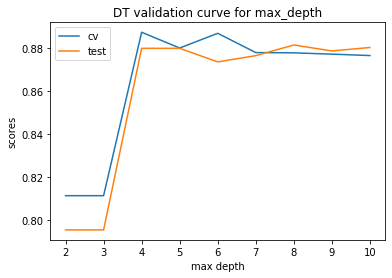

In [291]:
# Trước hết, hãy thử khảo sát DT với tham số max_depth
cv_accuracies_by_depth, test_accuracies_by_depth= [], []
max_depth_values= np.arange(2,11)

for curr_max_depth in max_depth_values:
  tree= DecisionTreeClassifier(random_state=random_state, max_depth=curr_max_depth)
  
  # cross-validation
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1')
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(curr_pred, y_test))

# Plot 
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')

In [292]:
# Thử sử dụng GridSearchCV để khảo sát Logistic
dict_param_logistic = {
    'penalty':['l2','l1','elasticnet','none'],
    'C':[0.1, 0.2, 0.3, 0.5, 0.8, 1.],
    'l1_ratio':[0.1,0.2,0.3],
    'solver':["saga"]
}
best_tree_logistic = grid_search('logsitc', n_jobs=-1, dict_param=dict_param_logistic)


/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


Best modelLogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.1, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


/home/huong/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Top  feature importances
Feature  0 - 0.25002715
Feature  1 - 0.21576801
Feature  2 - 0.21354228
Feature  3 - 0.099801235
Feature  4 - 0.09516794
Feature  5 - 0.04592691
Feature  6 - 0.042845502
Feature  7 - 0.036921


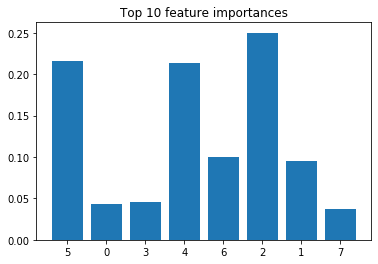

In [293]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree_logistic.coef_.reshape(-1)
importances = np.exp(importances) / (np.exp(importances).sum())
indices = np.argsort(importances)[::-1]
print('Top  feature importances')
# print(importances,indices)
for i in range(len(indices)):

    print('Feature ', i, '-', importances[indices[i]])

# indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(len(indices)), importances)
plt.xticks(range(len(indices)), indices)
plt.show()

In [294]:
# Thử sử dụng GridSearchCV để khảo sát
dict_param = {
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
best_tree = grid_search('decision-tree', n_jobs=-1, dict_param=dict_param)


Best modelDecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Top  feature importances
Feature  0 - 0.8123388521679661
Feature  1 - 0.16884315533214495
Feature  2 - 0.01099883990106485
Feature  3 - 0.0032772216071136973
Feature  4 - 0.0021994714723789217
Feature  5 - 0.001567656287834859
Feature  6 - 0.0007746368764843663
Feature  7 - 1.6635501226188769e-07


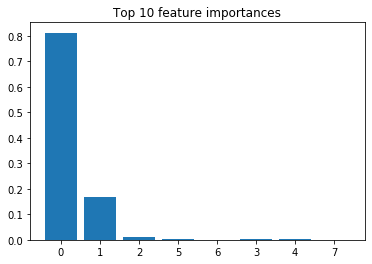

In [295]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top  feature importances')
for i in range(len(indices)):
    print('Feature ', i, '-', importances[indices[i]])

# indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(len(indices)), importances)
plt.xticks(range(len(indices)), indices)
plt.show()

Text(0.5, 1.0, 'DT validation curve for max_depth')

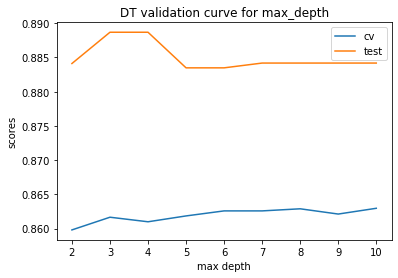

In [296]:

# Tương tự, thử khảo sát RF với số lượng cây n_estimators
# code
num_trees = [5, 10, 15, 20, 30, 50, 75, 100, 150]
cv_accuracies_by_depth, test_accuracies_by_depth= [], []


for num_tree in num_trees:
  tree = rf=RandomForestClassifier(random_state=random_state, n_estimators=num_tree)
  
  # cross-validation
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1')
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(curr_pred, y_test))

# Plot 
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')



In [297]:
# Sử dụng GridSearch CV
dict_param = {
    'max_depth': [3, 11, 15, 24, 27], 
    'min_samples_leaf': [1, 5, 7, 9, 15, 24],
    'max_features':  [3, 4, 6, 7],
    'n_estimators': [75]
}

best_forest = grid_search('random-forest', n_jobs=-1, dict_param=dict_param)


Best modelRandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Top  feature importances
Feature  0 - 0.7562354071369304
Feature  1 - 0.2127845263161117
Feature  2 - 0.01051884602072428
Feature  3 - 0.008220894487157864
Feature  4 - 0.005246881717523743
Feature  5 - 0.004222871618345723
Feature  6 - 0.0024982547518335283
Feature  7 - 0.0002723179513727135


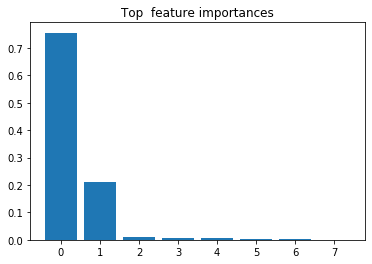

In [298]:
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]

print('Top  feature importances')
for i in range(len(indices)):
    print('Feature ', i, '-', importances[i])

# indices = indices[:len(indices)]
plt.figure()
plt.title('Top  feature importances')
plt.bar(range(len(indices)), importances)
plt.xticks(range(len(indices)), range(len(indices)))
plt.show()

In [299]:
# Imblanced class
'''
- Random Forest With Bootstrap Class Weighting
'''
'''
- Random Forest With Class Weighting
'''
'''
- Standard RF
'''
params = {
    'max_depth': best_forest.get_params()['max_depth'],
    'max_features': best_forest.get_params()['max_features'],
    'min_samples_leaf': best_forest.get_params()['min_samples_leaf'],
    'n_estimators': best_forest.get_params()['n_estimators'],
}
print("Standard RF")
evaluate(best_forest)

rf2 = RandomForestClassifier(max_depth=params['max_depth'], max_features=params['max_features'],
                             min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
                             class_weight='balanced_subsample')
rf2.fit(X_train, y_train)
print("Balanced_subsample RF")
evaluate(rf2)


Standard RF
Train Accuracy : 0.9902610981657406
Train f1 score : 0.9151925078043704
Train roc auc : 0.92769558334888
Train Confusion Matrix:
[[31389    31]
 [  295  1759]]
--------------------------------------------------
Test Accuracy : 0.9851671591633351
Test f1 score : 0.8796992481203008
Test roc auc : 0.8968482350967496
Test Confusion Matrix:
[[16067    14]
 [  242   936]]
Balanced_subsample RF
Train Accuracy : 0.9597000657226504
Train f1 score : 0.7464762262732568
Train roc auc : 0.9630618277853772
Train Confusion Matrix:
[[30139  1281]
 [   68  1986]]
--------------------------------------------------
Test Accuracy : 0.9420592154817776
Test f1 score : 0.688667496886675
Test roc auc : 0.940585801358551
Test Confusion Matrix:
[[15153   928]
 [   72  1106]]


In [ ]:
# c[0][0] = gt=0 & pred=0
# c[0][1] = gt[1] & pred=1

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
gnb_sigmoid = CalibratedClassifierCV(rf2, cv='prefit', method="sigmoid")
gnb_sigmoid.fit(X_train, y_train,)
prob_pos_gnbsig = gnb_sigmoid.predict_proba(X_test)[:, 1]

In [ ]:
prob_pos_gnbsig.shape

(785,)

In [ ]:
prob_pos_gnbsig

In [ ]:
y_test

In [ ]:
# line : [14,23],[34,42] -> [14,23,34,42]
